In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
with open('annotations/instances_train2017.json', 'r') as f:
    data = json.load(f)

In [15]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [16]:
data['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [25]:
data['images'][2]

{'license': 3,
 'file_name': '000000184613.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000184613.jpg',
 'height': 336,
 'width': 500,
 'date_captured': '2013-11-14 12:36:29',
 'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg',
 'id': 184613}

In [24]:
[d for d in data['annotations'] if d['image_id'] == 522418]

[{'segmentation': [[426.91,
    58.24,
    434.49,
    77.74,
    467.0,
    80.99,
    485.42,
    86.41,
    493.0,
    129.75,
    521.17,
    128.67,
    532.01,
    144.92,
    545.01,
    164.42,
    552.6,
    170.93,
    588.35,
    178.51,
    629.53,
    165.51,
    629.53,
    177.43,
    578.6,
    214.27,
    558.01,
    241.35,
    526.59,
    329.12,
    512.51,
    370.29,
    502.75,
    415.8,
    418.24,
    409.3,
    399.82,
    414.72,
    388.98,
    420.14,
    382.48,
    424.47,
    391.15,
    430.97,
    414.99,
    425.55,
    447.49,
    427.72,
    449.66,
    435.3,
    431.24,
    438.56,
    421.49,
    452.64,
    422.57,
    456.98,
    432.33,
    464.56,
    439.91,
    458.06,
    481.08,
    465.64,
    502.75,
    464.56,
    507.09,
    473.23,
    639.28,
    474.31,
    639.28,
    1.9,
    431.24,
    0.0]],
  'area': 63325.421899999994,
  'iscrowd': 0,
  'image_id': 522418,
  'bbox': [382.48, 0.0, 256.8, 474.31],
  'category_id': 1,
  'id':

In [4]:
category_df = pd.DataFrame(data['categories'])[['id', 'name']]
category_df.head()

,id,name
0,1,person
1,2,bicycle
2,3,car
3,4,motorcycle
4,5,airplane


In [24]:
idxs = set([value['image_id'] for value in data['annotations']])
len(idxs)

117266

In [5]:
images_id = [value['category_id'] for value in data['annotations']]
df = pd.DataFrame(data=images_id, columns=['id'])
df.head()

,id
0,58
1,58
2,58
3,58
4,58


In [15]:
df.shape

(860001, 1)

In [6]:
merged_df = pd.merge(category_df, df, on='id')
merged_df.head()

,id,name
0,1,person
1,1,person
2,1,person
3,1,person
4,1,person


In [7]:
images_per_label = merged_df.groupby('name').size().sort_values()

In [8]:
plt.style.use('fivethirtyeight')

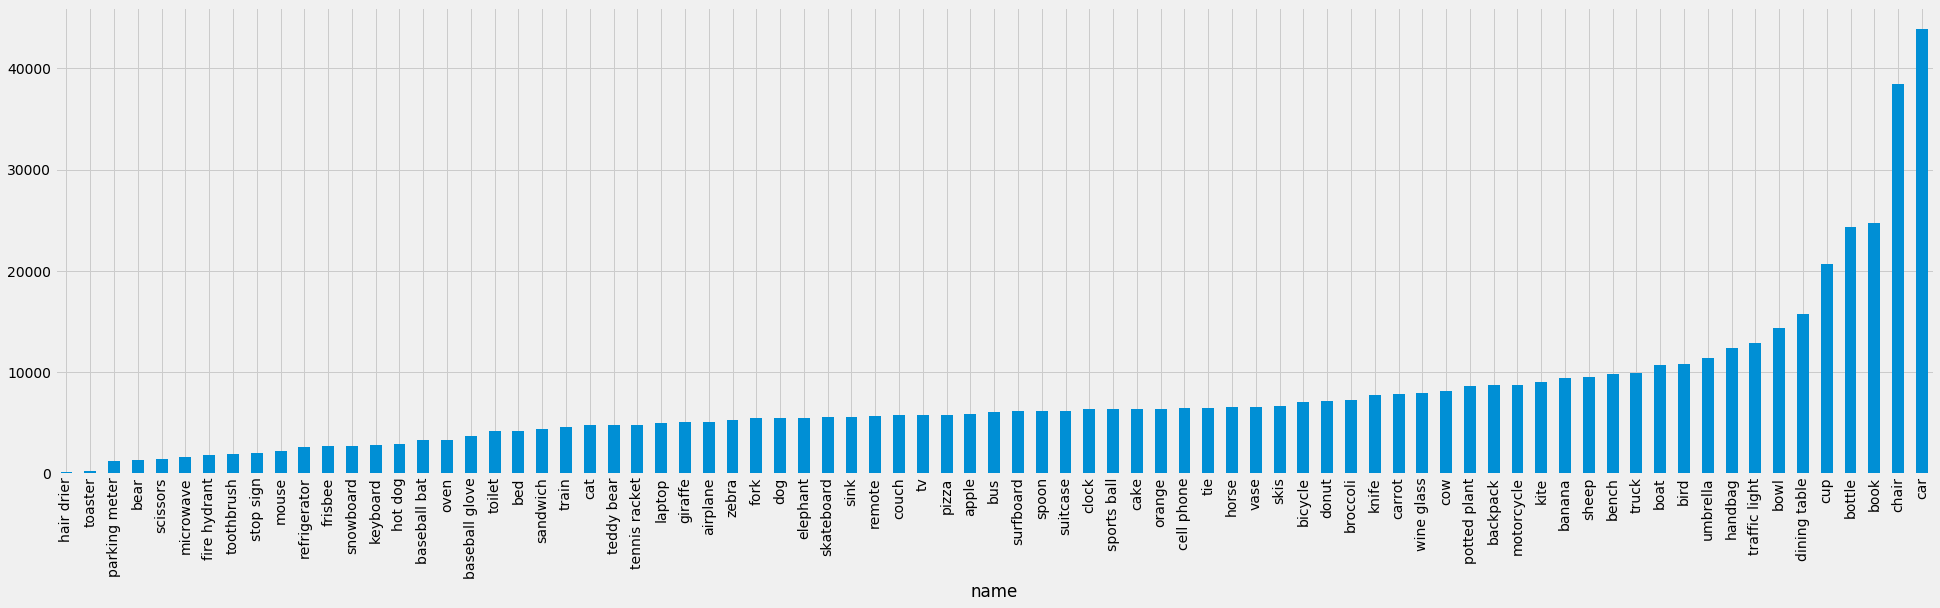

In [14]:
fig, ax = plt.subplots(1,1, figsize=(30,8))
images_per_label.plot(kind='bar', ax=ax)

In [11]:
ax.get_ylabel()

''

In [25]:
images_per_label

name
hair drier           198
toaster              225
parking meter       1285
bear                1294
scissors            1481
microwave           1673
fire hydrant        1865
toothbrush          1954
stop sign           1983
mouse               2262
refrigerator        2637
frisbee             2682
snowboard           2685
keyboard            2855
hot dog             2918
baseball bat        3276
oven                3334
baseball glove      3747
toilet              4157
bed                 4192
sandwich            4373
train               4571
cat                 4768
teddy bear          4793
tennis racket       4812
laptop              4970
giraffe             5131
airplane            5135
zebra               5303
fork                5479
                   ...  
vase                6613
skis                6646
bicycle             7113
donut               7179
broccoli            7308
knife               7770
carrot              7852
wine glass          7913
cow                 